In [13]:

import os 
import sqlite3
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
import matplotlib.pyplot as plt
sql_to_reterive_cat_fact = "SELECT fact FROM CAT_FACTS"
with sqlite3.connect("dbs/interview.db") as conn:
    cursor = conn.cursor()
    cursor.execute(sql_to_reterive_cat_fact)
    facts = cursor.fetchall()
    print(facts[0][0]) # print the first fact 


Unlike dogs, cats do not have a sweet tooth. Scientists believe this is due to a mutation in a key taste receptor.


In [2]:
spacy_nlp = spacy.load("en_core_web_sm")
spacied_cat_facts = [spacy_nlp(fact[0]) for fact in facts]

# remove stop words and punctuations
stopwords = spacy.lang.en.stop_words.STOP_WORDS

spacied_cat_facts_wo_stopwords_punc = []

for spacied_fact in spacied_cat_facts:
    spacied_cat_facts_wo_stopwords_punc.append(
	[token for token in spacied_fact if token.text not in stopwords and not token.is_punct])


In [3]:
# lemmatize the words
lemmatized_cat_facts = []

for spacied_fact in spacied_cat_facts_wo_stopwords_punc:
    lemmatized_cat_facts.append([token.lemma_ for token in spacied_fact])

In [4]:
spacy_nlp.add_pipe("spacytextblob")

In [5]:
# Score the sentiment of each fact
clean_texts = []
sentiment_scores = []

for fact in lemmatized_cat_facts:
	clean_text = " ".join(fact)
	doc = spacy_nlp(clean_text)
	clean_texts.append(clean_text)
	sentiment_scores.append(doc._.blob.polarity)

# Store the sentiment scores in a dataframe
df = pd.DataFrame({"clean_text": clean_texts, "sentiment_score": sentiment_scores})


In [6]:
# split sentiments into 5 categories to the dataframe
df["sentiment"] = pd.cut(df["sentiment_score"],[-1, -0.5,-0.1, 0.1, 0.5, 1], labels=["negative", "negative-neutral", "neutral", "neutral-positive","positive"])

In [12]:
%matplotlib inline

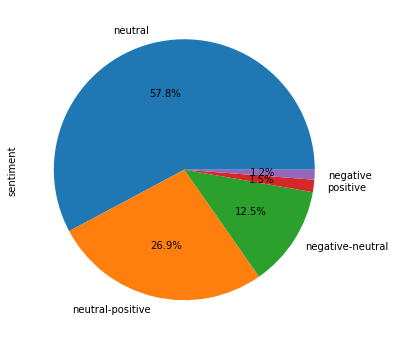

In [14]:
# plot pie chart of the sentiment
df["sentiment"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6, 6))
plt.show()

<AxesSubplot:ylabel='Frequency'>

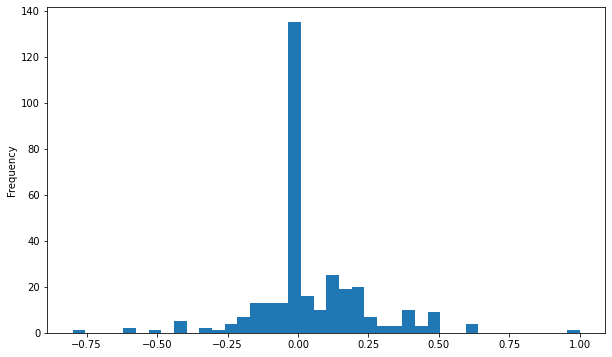

In [15]:
df["sentiment_score"].plot.hist(bins=40, figsize=(10, 6))

Before conducting the sentitment analysis, I excpected most the fact should be netural or netural positive as cats are pets (People must like them so consider take them as pet, except fot the dog person?)

After cleaning the text, above pie chart and histogram confirm my thoughts: most the fact are neutral or netural positive